<a href="https://colab.research.google.com/github/Thesun01/Hello-HTML-/blob/master/Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
tf.print('Hello')

Hello


In [ ]:
import tensorflow as tf

In [ ]:
tf.print(tf.__version__)

2.3.0


Currently TensorFlow is the most famous deep learning library in the world developed by google, TensorFlow architecture works in three-part first it preprocess the data then it builds the model and then it trains and estimate the model and then evaluate the performance of the model. It is called TensorFlow because it takes input as a multidimensional array which is also known as a Tensor.

Now we will see why every data scientist learns TensorFlow 2.x, not TensorFlow 1.x, The TensorFlow 2.x is recently released by Google. There are so many things which google has changed in TensorFlow 2.0 so the TensorFlow makes the user more productive including the removing redundant APIs and making APIs more consistent, TensorFlow 1.x has many APIs and most of them were redundant and many times users get confused that which is the best way and how to use those APIs to get the better accuracy.

In TensorFlow 2.0 google has removed all those APIs, so moreover google has done the API clean up and it has used eager execution which is pythonic based moreover and it improves the execution time and while defining the variables in TensorFlow 2.0 it does not use any global variables, and TensorFlow 2.0 has also removed the sessions.


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras


In [ ]:
mnist = keras.datasets.fashion_mnist

In [ ]:
type(mnist)

module

In [ ]:
(x_tain,y_train),(x_test,y_test) =mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_tain.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
np.max(x_tain)


255

In [ ]:
np.mean(x_tain)

72.94035223214286

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle','boot']

In [ ]:
# Data ExploratExploration 
x_tain.shape

(60000, 28, 28)

** This testing data set concontains the 10000 images of size 28*28 **

In [ ]:
x_test.shape

(10000, 28, 28)

Here we have plotted the second image of our training set i.e. the image at index 1.
The plt.figure() function in pyplot module of matplotlib library is used to create a new figure. The plt.imshow() function in pyplot module of matplotlib library is used to display data as an image. plt.colorbar() displays the colour bar besides the image. You can see that the values are between 0 and 255.


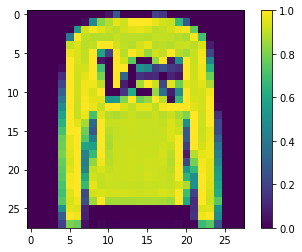

In [ ]:
plt.figure()
plt.imshow(x_test[1])
plt.colorbar()

As you can see the image is a top and the value at index 1 of y_train also corresponds to the class name top.

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Neural Network model doesn’t take value greater than 1. So we need to bring all the values between 0 and 1. To do this we will divide all the values in the training and testing dataset by 255 as the greatest value in our dataset is 255.

In [ ]:
x_tain = x_tain/255.0
x_test = x_test/255.0

Now we can see that all the values are between 0 and 1.

In [ ]:
# x_tain

In [ ]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

Build the model with TF 2.0
We will import the necessary layers to build the model. The Neural Network is constructed from 3 type of layers:

Input layer — initial data for the neural network.
Hidden layers — intermediate layer between input and output layer and place where all the computation is done.
Output layer — produce the result for given inputs.

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

Flatten() is used as the input layer to convert the data into a 1-dimensional array for inputting it to the next layer. Our image 2D image will be converted to a single 1D column. input_shape = (28,28) because the size of our input image is 28×28.

Dense() layer is the regular deeply connected neural network layer. It is most common and frequently used layer. We have a dense layer with 128 neurons with activation function relu. The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

The output layer is a dense layer with 10 neurons because we have 10 classes. The activation function used is softmax. Softmax converts a real vector to a vector of categorical probabilities. The elements of the output vector are in range (0, 1) and sum to 1. Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation ='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Model compilation
Loss Function: A loss function is used to optimize the parameter values in a neural network model. Loss functions map a set of parameter values for the network onto a scalar value that indicates how well those parameter accomplish the task the network is intended to do.
Optimizer: Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.
Metrics: A metric is a function that is used to judge the performance of your model. Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model.
Here we are compiling the model and fitting it to the training data. We will use 10 epochs to train the model. An epoch is an iteration over the entire data provided.


In [ ]:
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_tain, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4953 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3728 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3347 - accuracy: 0.8789
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3130 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2816 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2685 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2576 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2479 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

Now we will evaluate the accuracy using the test data. We have got an accuracy of 
88.41%.

In [ ]:
test_loss, test_acc =model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8762
0.8762000203132629


Now we are going to do predictions using sklearn and see the accuracy. For that we will import accuracy_score from sklearn.

from sklearn.metrics import accuracy_score

predict_classes generates class predictions for the input samples. Here we are giving X_test containing 10000 images as the input. We are even predicting the accuracy. In multilabel classification, accuracy_score computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_test.


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = model.predict_classes(x_test)
accuracy_score(y_test, y_pred)
 

NameError: ignored

In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

dtype=int64)
predict() returns an array unlike predict_class() which returns categorical values. The array contains the confidence level for each of the class.

In [ ]:
pred = model.predict(x_test)
pred


array([[6.8689491e-07, 1.0641002e-11, 6.4072586e-10, ..., 7.3293253e-04,
        9.8310837e-10, 9.9892801e-01],
       [5.3661338e-06, 3.2258357e-13, 9.9321270e-01, ..., 4.4447755e-21,
        2.4795478e-11, 2.7556126e-16],
       [1.2470665e-07, 9.9999988e-01, 1.2044912e-09, ..., 2.6962400e-25,
        1.0522829e-12, 4.6553947e-19],
       ...,
       [5.7370892e-07, 3.0894273e-13, 3.5026719e-08, ..., 3.8180947e-12,
        9.9999011e-01, 7.3994162e-16],
       [4.0170541e-08, 9.9999845e-01, 5.6525257e-10, ..., 7.2541695e-17,
        1.1082909e-09, 5.8037972e-16],
       [1.1179267e-06, 1.1691634e-07, 2.0770531e-06, ..., 7.7743753e-05,
        2.6288722e-05, 5.6985994e-07]], dtype=float32)

As you can see for the test image at index 0, predict has retured this array. In this the value at index 9 is the greatest. This shows that the model has predicted the test image at index 0 to have class 9 which is ankle boot.

In [ ]:
pred[0]

array([6.8689491e-07, 1.0641002e-11, 6.4072586e-10, 3.5839222e-12,
       1.1282041e-09, 3.3758924e-04, 7.5350198e-07, 7.3293253e-04,
       9.8310837e-10, 9.9892801e-01], dtype=float32)

argmax() returns the index of the maximum value. Hence we can see that the predicted class is 9 as maximum value is found at index position 9.

In [ ]:
np.argmax(pred[0])

9

For the second image in the test data i.e. the image at index 1 the predicted class is 2 which is pullover.


In [ ]:
np.argmax(pred[1])

2

The model gives an accuracy of 91.2% on the training data and 88.41% on test data. Hence the model is overfitting the training data. Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize. To avoid overfitting we can use Convolutional Neural Networks.